## Regresión logística

In [29]:
import statsmodels.api as sm
import pyreadstat as pr
import matplotlib.pyplot as plt
import numpy as np
# Modelo de Regresión
from sklearn import linear_model
# Metrica que mide que tan acertado es el modelo al realizar una predicción
from sklearn.metrics import accuracy_score

In [2]:
arc = '../datasets/compensacion-ejecutivos.sav'
df, meta = pr.read_sav(arc)
df.head()

,salario,noasiat,gpa,postgrad,experien
0,99026.0,0.0,3.36,0.0,15.0
1,69190.0,1.0,2.35,1.0,9.0
2,95453.0,1.0,3.33,1.0,10.0
3,57695.0,1.0,3.37,0.0,2.0
4,94364.0,1.0,3.87,1.0,4.0


In [3]:
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [4]:
df.salario.describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

In [7]:

y = np.where(df['salario'] > 96000, 1, 0)
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [8]:
x = df.drop(['salario'], axis=1)
x

,noasiat,gpa,postgrad,experien
0,0.0,3.36,0.0,15.0
1,1.0,2.35,1.0,9.0
2,1.0,3.33,1.0,10.0
3,1.0,3.37,0.0,2.0
4,1.0,3.87,1.0,4.0
...,...,...,...,...
105,1.0,3.12,1.0,2.0
106,0.0,3.36,0.0,5.0
107,0.0,2.51,1.0,3.0
108,1.0,2.89,0.0,8.0


Text(0, 0.5, 'y')

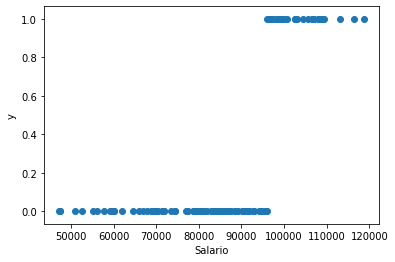

In [9]:
fig, ax = plt.subplots()
ax.scatter(df.salario, y)
ax.set_xlabel('Salario')
ax.set_ylabel('y')

In [20]:
reg_log = linear_model.LogisticRegression()
reg_log.fit(x,y)
# Estimado como probabilidad
y_estimado_1 = reg_log.predict_proba(x)[:,1]

In [19]:
y_estimado_1

array([5.60461822e-01, 2.18511060e-02, 3.40713796e-01, 1.78408868e-02,
       3.29151263e-01, 7.96981996e-01, 7.75217424e-02, 5.79840206e-01,
       1.96337424e-01, 2.23688334e-02, 9.38905048e-02, 1.52477253e-01,
       4.60623344e-03, 6.80736034e-01, 2.36672162e-01, 2.32983883e-01,
       2.64877181e-02, 4.08086905e-01, 6.22718055e-01, 8.19254265e-04,
       6.79749578e-01, 1.77262355e-01, 4.84578109e-01, 1.19118594e-02,
       4.95105410e-03, 2.22525593e-02, 5.72691371e-01, 1.06357265e-01,
       1.48324507e-02, 3.76063257e-01, 4.46845890e-01, 5.03537624e-01,
       4.76812772e-03, 5.53016419e-01, 1.57016516e-01, 5.90365186e-01,
       7.48524569e-02, 6.18930473e-01, 2.79821150e-01, 4.16278991e-01,
       3.02424904e-01, 1.51683200e-02, 5.59124020e-01, 2.46196442e-01,
       1.44120593e-02, 6.68076012e-01, 7.87662744e-01, 1.26051430e-01,
       8.57368843e-02, 6.64205865e-01, 9.58222158e-01, 9.66547648e-01,
       2.21804096e-02, 4.09341892e-02, 6.53760730e-01, 3.55711998e-01,
      

In [12]:
# Estimado como valor
y_estimado = reg_log.predict(x)
y_estimado

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [21]:
y == y_estimado

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [34]:
accuracy_score(y,reg_log.predict(x))

0.9090909090909091

In [32]:
x.columns

Index(['noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')